# Exploratoty and Descriptive Analysis (EDA) Parte II 

In [414]:
import pandas as pd
import seaborn as sns
import numpy as np
import joblib

from matplotlib import gridspec 
from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [415]:
data = pd.read_csv('../data/kc_house_data.csv')

In [416]:
data['date'] = pd.to_datetime(data['date'], format ='%Y-%m-%d')
data['yr_built'] = pd.to_datetime(data['yr_built'], format = '%Y').dt.year
data.loc[data['yr_renovated']!= 0, 'yr_renovated' ] = pd.to_datetime(data.loc[data['yr_renovated']!= 0, 'yr_renovated' ], format = '%Y').dt.year

In [417]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

Limitemos nuestro análisis a propiedades de menos de un millón de dólares

In [418]:
data = data[data['price']<2000000]

data = data[(data['bedrooms']<6)&
     (data['sqft_living']<7000)&
     (data['sqft_above']<5000)&
     (data['sqft_basement']<3000)&
     (data['sqft_lot15']<20000)]

## Hay relación entre el precio y la fecha de la venta? 

In [84]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [88]:
data['month'] = data['date'].dt.month
data['week_of_year'] = data['date'].dt.weekofyear
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek


C:\Users\Windows\AppData\Local\Temp\ipykernel_17164\3071502936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['date'].dt.month
C:\Users\Windows\AppData\Local\Temp\ipykernel_17164\3071502936.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['week_of_year'] = data['date'].dt.weekofyear
C:\Users\Windows\AppData\Local\Temp\ipykernel_17164\3071502936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

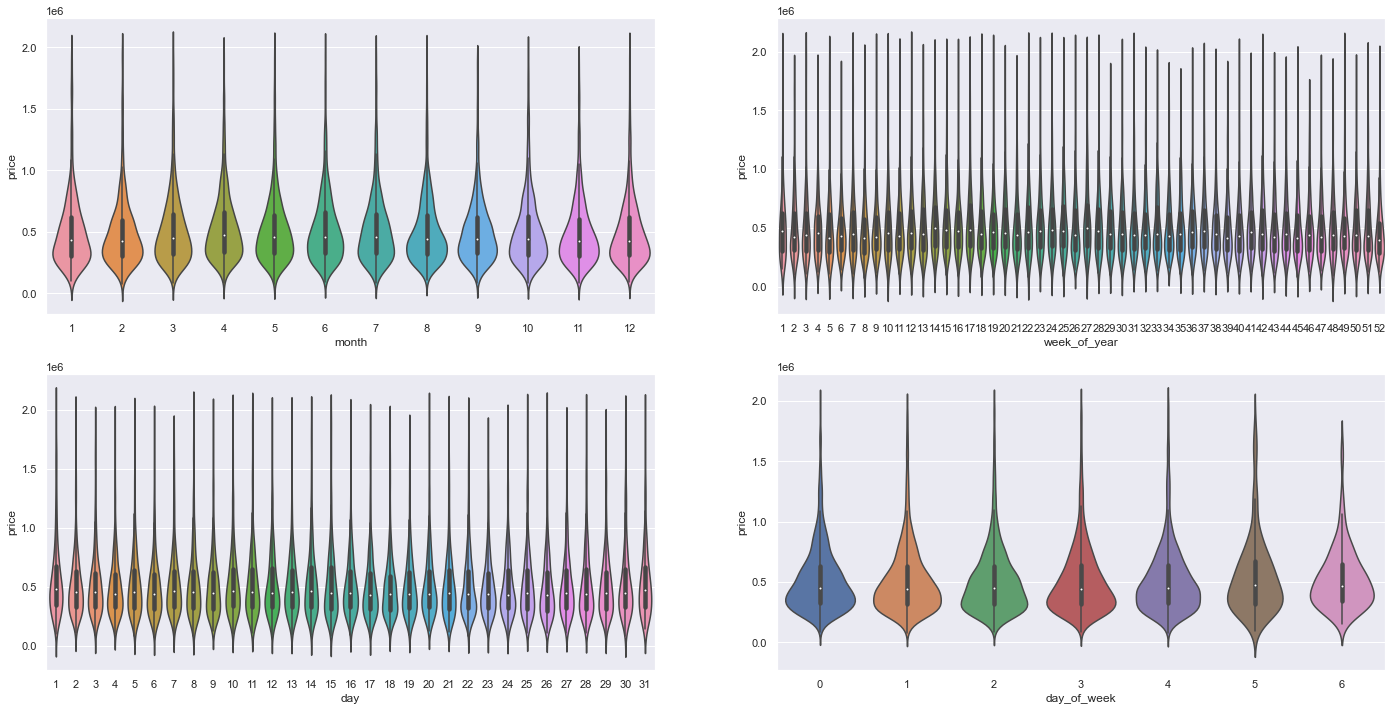

In [89]:
fig = plt.figure(figsize = (24,12))
gs = gridspec.GridSpec(2, 2, figure = fig)

ax1 = fig.add_subplot(gs[0,0])
ax1 = sns.violinplot(x = 'month', y='price', data = data)
ax2 = fig.add_subplot(gs[0,1])
ax2 = sns.violinplot(x = 'week_of_year', y='price', data = data)
ax3 = fig.add_subplot(gs[1,0])
ax3 = sns.violinplot(x = 'day', y='price', data = data)
ax4 = fig.add_subplot(gs[1,1])
ax4 = sns.violinplot(x = 'day_of_week', y='price', data = data)

### Relación del precio con Habitaciones y baños?

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

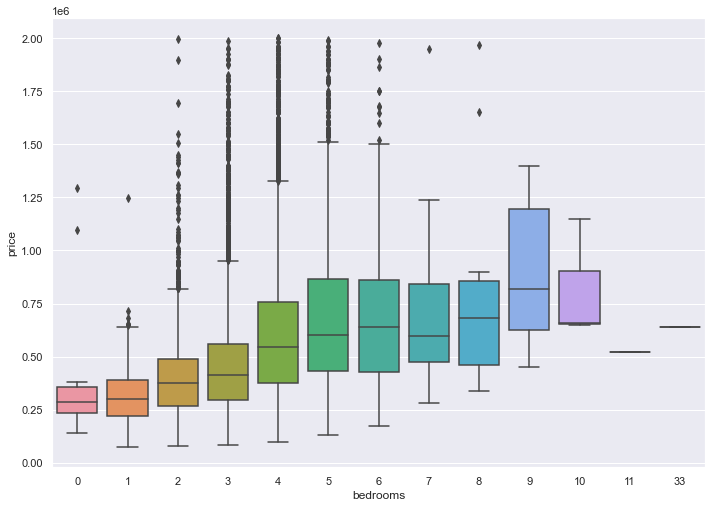

In [90]:
sns.boxplot(x='bedrooms', y='price', data = data)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

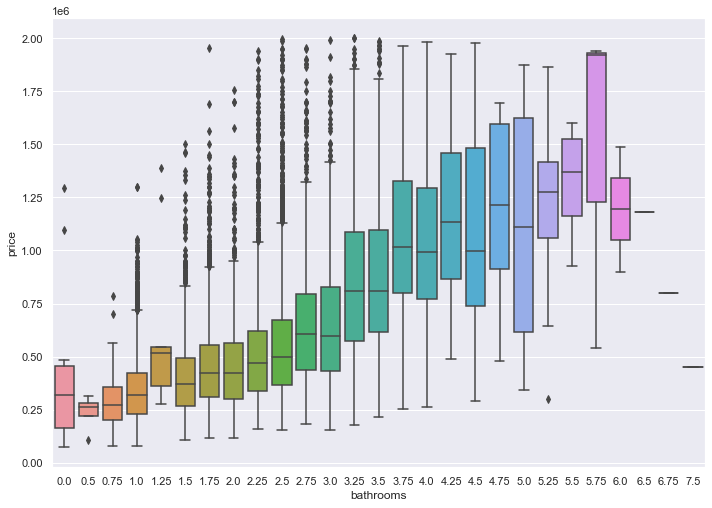

In [91]:
sns.boxplot(x='bathrooms', y='price', data = data)

### Relación entre diferentes categorías de área y precio

In [93]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'month', 'week_of_year',
       'day', 'day_of_week'],
      dtype='object')

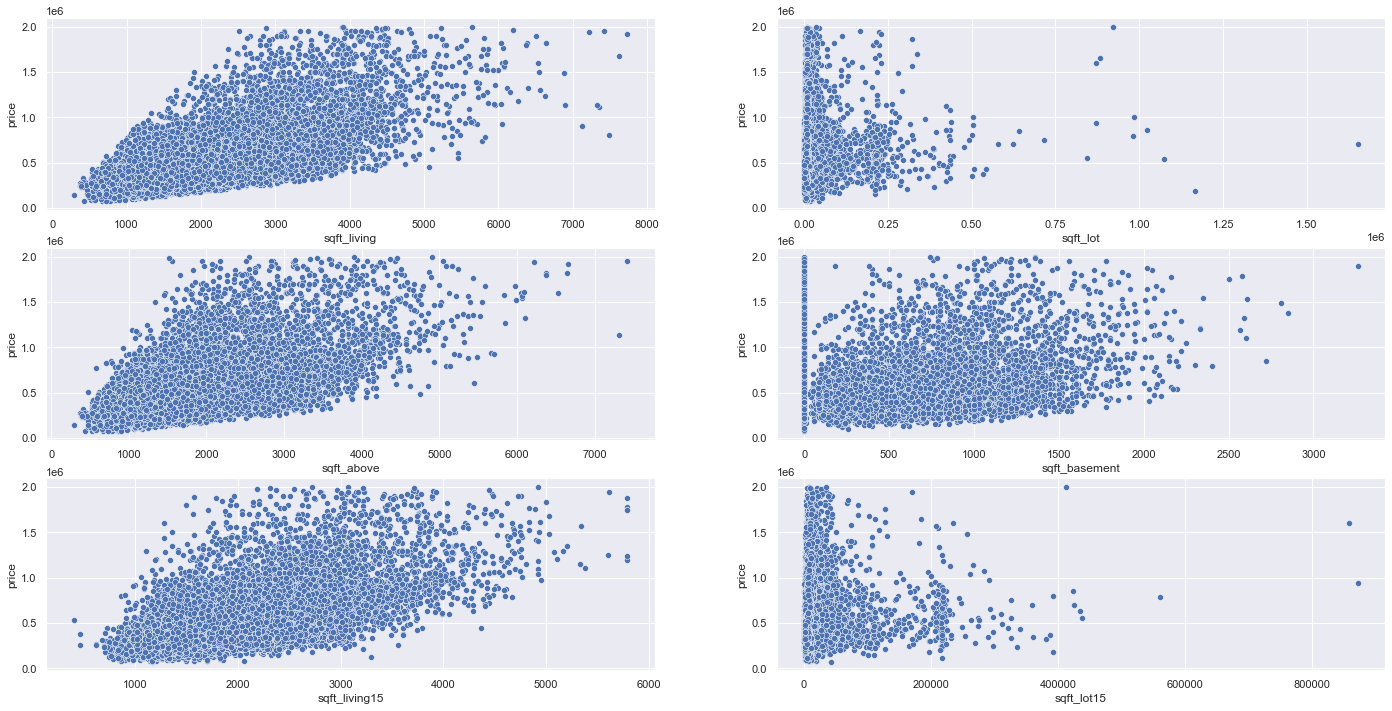

In [94]:
fig = plt.figure(figsize = (24,12))
gs = gridspec.GridSpec(3, 2, figure = fig)

ax1 = fig.add_subplot(gs[0,0])
ax1 = sns.scatterplot(x = 'sqft_living', y='price', data = data)
ax2 = fig.add_subplot(gs[0,1])
ax2 = sns.scatterplot(x = 'sqft_lot', y='price', data = data)
ax3 = fig.add_subplot(gs[1,0])
ax3 = sns.scatterplot(x = 'sqft_above', y='price', data = data)
ax4 = fig.add_subplot(gs[1,1])
ax4 = sns.scatterplot(x = 'sqft_basement', y='price', data = data)
ax5 = fig.add_subplot(gs[2,0])
ax5 = sns.scatterplot(x = 'sqft_living15', y='price', data = data)
ax6 = fig.add_subplot(gs[2,1])
ax6 = sns.scatterplot(x = 'sqft_lot15', y='price', data = data)

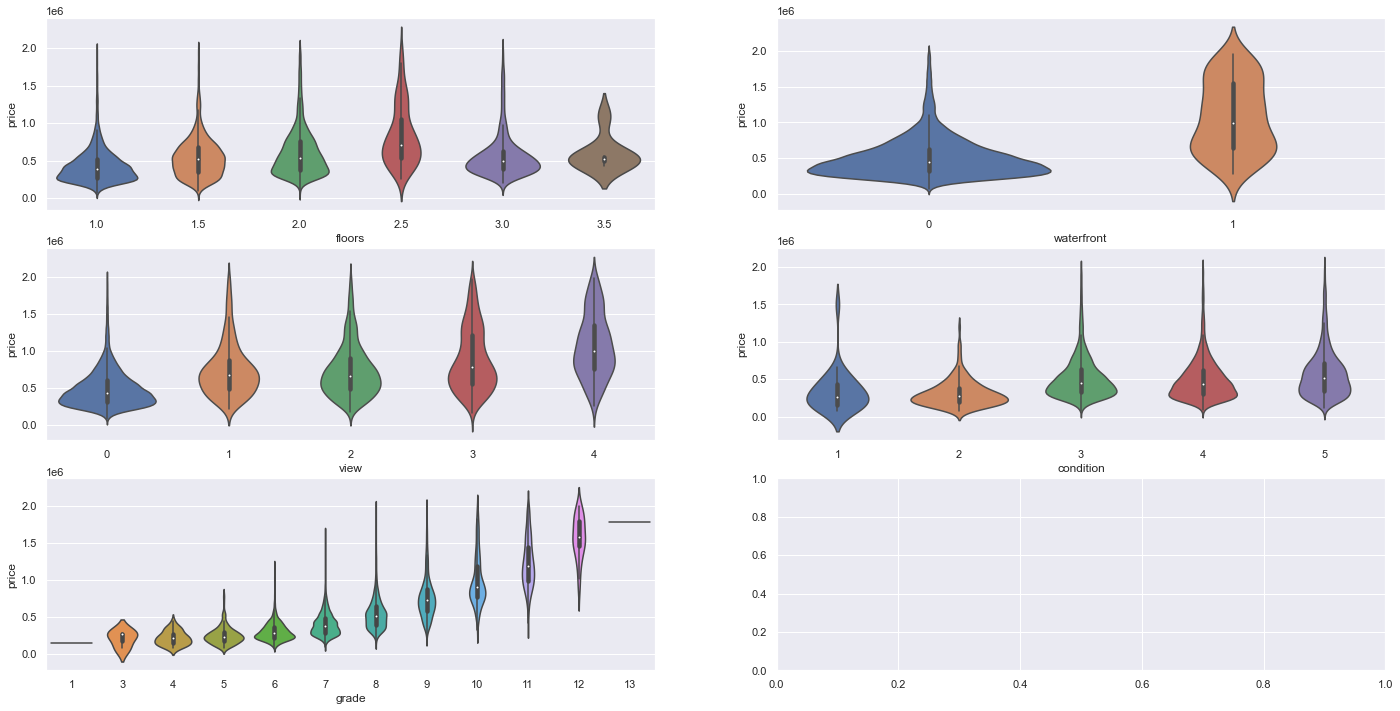

In [95]:
fig = plt.figure(figsize = (24,12))
gs = gridspec.GridSpec(3, 2, figure = fig)

ax1 = fig.add_subplot(gs[0,0])
ax1 = sns.violinplot(x = 'floors', y='price', data = data)
ax2 = fig.add_subplot(gs[0,1])
ax2 = sns.violinplot(x = 'waterfront', y='price', data = data)
ax3 = fig.add_subplot(gs[1,0])
ax3 = sns.violinplot(x = 'view', y='price', data = data)
ax4 = fig.add_subplot(gs[1,1])
ax4 = sns.violinplot(x = 'condition', y='price', data = data)
ax5 = fig.add_subplot(gs[2,0])
ax5 = sns.violinplot(x = 'grade', y='price', data = data)
ax6 = fig.add_subplot(gs[2,1])
# ax6 = sns.scatterplot(x = 'sqft_lot15', y='price', data = data)

# Preparación de la variables

In [419]:
data['yr_renovated_dummy'] = data['yr_renovated'].apply(lambda x: 1 if x!=0 else 0)

In [420]:
columns = ['price','bedrooms', 'bathrooms', 'sqft_living', 'floors','waterfront', 'view', 'condition', 'grade',
          'yr_built', 'yr_renovated_dummy']
data_aux = data[columns]

In [421]:
data_aux['property_age'] = 2015-data_aux['yr_built']

C:\Users\Windows\AppData\Local\Temp\ipykernel_17164\2804049904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aux['property_age'] = 2015-data_aux['yr_built']


In [422]:
data_aux.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated_dummy,property_age
0,221900.0,3,1.00,1180,1.0,0,0,3,7,1955,0,60
1,538000.0,3,2.25,2570,2.0,0,0,3,7,1951,1,64
2,180000.0,2,1.00,770,1.0,0,0,3,6,1933,0,82
3,604000.0,4,3.00,1960,1.0,0,0,5,7,1965,0,50
4,510000.0,3,2.00,1680,1.0,0,0,3,8,1987,0,28


In [423]:
# Matriz de información
X = data_aux.drop(columns = ['price'])
# Variable respuesta
y = data_aux['price']

Se genera la partición en conjunto de entrenamiento (80%) y conjunto de test (20%)

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [425]:
X_train.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated_dummy,property_age
17118,4,3.50,3920,2.0,0,0,3,9,2004,0,11
15044,2,1.75,1660,1.0,0,0,3,7,1942,0,73
11264,3,1.75,2060,1.0,0,0,5,7,1951,0,64
15673,3,1.50,1180,1.0,0,0,4,7,1959,0,56
13362,3,2.50,2770,2.0,0,2,3,9,1992,0,23


### Transformando X_train

In [426]:
scaler = MinMaxScaler()
X_train[['bedrooms']] = scaler.fit_transform(X_train[['bedrooms']])
joblib.dump(scaler, '../parameters/bedrooms.sav')

['../parameters/bedrooms.sav']

In [427]:
scaler = MinMaxScaler()
X_train[['bathrooms']] = scaler.fit_transform(X_train[['bathrooms']])
joblib.dump(scaler, '../parameters/bathrooms.sav')

['../parameters/bathrooms.sav']

In [428]:
scaler = RobustScaler()
X_train[['sqft_living']] = scaler.fit_transform(X_train[['sqft_living']])
joblib.dump(scaler, '../parameters/sqft_living.sav')

['../parameters/sqft_living.sav']

In [429]:
scaler = MinMaxScaler()
X_train[['view']] = scaler.fit_transform(X_train[['view']])
joblib.dump(scaler, '../parameters/view.sav')

['../parameters/view.sav']

In [430]:
scaler = MinMaxScaler()
X_train[['condition']] = scaler.fit_transform(X_train[['condition']])
joblib.dump(scaler, '../parameters/condition.sav')

['../parameters/condition.sav']

In [431]:
scaler = MinMaxScaler()
X_train[['grade']] = scaler.fit_transform(X_train[['grade']])
joblib.dump(scaler, '../parameters/grade.sav')

['../parameters/grade.sav']

In [432]:
scaler = MinMaxScaler()
X_train[['property_age']] = scaler.fit_transform(X_train[['property_age']])
joblib.dump(scaler, '../parameters/property_age.sav')

['../parameters/property_age.sav']

In [433]:
scaler = MinMaxScaler()
X_train[['floors']] = scaler.fit_transform(X_train[['floors']])
joblib.dump(scaler, '../parameters/floors.sav')

['../parameters/floors.sav']

In [434]:
X_train = X_train.drop(columns = ['yr_built'])

In [435]:
X_train.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_renovated_dummy,property_age
17118,0.8,0.666667,2.019417,0.4,0,0.0,0.50,0.6,0,0.095652
15044,0.4,0.333333,-0.174757,0.0,0,0.0,0.50,0.4,0,0.634783
11264,0.6,0.333333,0.213592,0.0,0,0.0,1.00,0.4,0,0.556522
15673,0.6,0.285714,-0.640777,0.0,0,0.0,0.75,0.4,0,0.486957
13362,0.6,0.476190,0.902913,0.4,0,0.5,0.50,0.6,0,0.200000


In [436]:
y_train = np.log1p(y_train )

In [437]:
y_train.head()

17118    13.697854
15044    13.089842
11264    13.122265
15673    12.873905
13362    13.527763
Name: price, dtype: float64

### Transformando X_test

In [438]:
X_test.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated_dummy,property_age
4886,4,2.5,2800,2.0,0,0,3,8,1993,0,22
7089,3,1.0,1270,1.0,0,0,3,7,1953,0,62
11444,5,1.0,1120,1.5,0,0,4,7,1962,0,53
8364,3,1.0,1050,1.0,0,0,3,7,1941,0,74
3614,4,2.5,3140,2.0,0,0,3,9,1993,0,22


In [439]:
transformacion = joblib.load('../parameters/bathrooms.sav')
X_test[['bathrooms']] = transformacion.transform(X_test[['bathrooms']])

In [440]:
transformacion = joblib.load('../parameters/bedrooms.sav')
X_test[['bedrooms']] = transformacion.transform(X_test[['bedrooms']])

In [441]:
transformacion = joblib.load('../parameters/condition.sav')
X_test[['condition']] = transformacion.transform(X_test[['condition']])

In [442]:
transformacion = joblib.load('../parameters/floors.sav')
X_test[['floors']] = transformacion.transform(X_test[['floors']])

In [443]:
transformacion = joblib.load('../parameters/grade.sav')
X_test[['grade']] = transformacion.transform(X_test[['grade']])

In [444]:
transformacion = joblib.load('../parameters/property_age.sav')
X_test[['property_age']] = transformacion.transform(X_test[['property_age']])

In [445]:
transformacion = joblib.load('../parameters/sqft_living.sav')
X_test[['sqft_living']] = transformacion.transform(X_test[['sqft_living']])

In [446]:
transformacion = joblib.load('../parameters/view.sav')
X_test[['view']] = transformacion.transform(X_test[['view']])

In [458]:
X_test = X_test.drop(columns= ['yr_built'])

# Machine Learning

In [448]:
def metricas(modelo, yobs, yhat):
    # MAE 
    MAE = np.mean(np.abs(yobs-yhat))
    # MAPE
    MAPE = 100*np.mean(np.abs((yobs-yhat)/yobs))
    # RMSE
    RMSE = np.sqrt(np.mean((yobs-yhat)**2))
    # MSE
    MSE = np.mean((yobs-yhat)**2)
    return pd.DataFrame({'Modelo' : modelo,
                         'MAE' : MAE,
                         'MAPE' : MAPE, 
                         'RMSE' : RMSE,
                         'MSE' : MSE
    }, index =[0])

### Regresión Lineal

In [452]:
modelo = LinearRegression()
ajuste = modelo.fit(X_train,y_train)

In [453]:
X_test.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated_dummy,property_age
4886,0.8,0.476190,0.932039,0.4,0,0.0,0.50,0.5,1993,0,0.191304
7089,0.6,0.190476,-0.553398,0.0,0,0.0,0.50,0.4,1953,0,0.539130
11444,1.0,0.190476,-0.699029,0.2,0,0.0,0.75,0.4,1962,0,0.460870
8364,0.6,0.190476,-0.766990,0.0,0,0.0,0.50,0.4,1941,0,0.643478
3614,0.8,0.476190,1.262136,0.4,0,0.0,0.50,0.6,1993,0,0.191304


In [459]:
y_ajustado = ajuste.predict(X_test)

In [466]:
df = pd.DataFrame({'Actual': y_test), 'Predicho': y_ajustado})
df

,Actual,Predicho
4886,350000.0,5.181575e+05
7089,281500.0,3.244573e+05
11444,340000.0,3.025617e+05
8364,414500.0,3.342573e+05
3614,464000.0,6.920995e+05
...,...,...
21424,890000.0,1.060714e+06
2929,700000.0,4.092725e+05
3331,380000.0,3.527310e+05
17709,1080000.0,6.399550e+05


In [202]:
metricas('regresión',y_test,y_ajustado)

,Modelo,MAE,MAPE,RMSE,MSE
0,regresión,125693.921689,27.852915,175426.320186,3.077439e+10


In [463]:
metricas('regresión',np.log1p(y_test),y_ajustado)

,Modelo,MAE,MAPE,RMSE,MSE
0,regresión,0.250951,1.938193,0.314264,0.098762


In [465]:
metricas('regresión',y_test,np.expm1(y_ajustado))

,Modelo,MAE,MAPE,RMSE,MSE
0,regresión,122494.01828,26.241176,177158.925534,3.138528e+10
